<a href="https://colab.research.google.com/github/vatturisrinivas/op_project/blob/main/Implement_Multi_Layer_Perceptron_algorithm_for_Image_denoising_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0524 - val_loss: 0.0359
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0337 - val_loss: 0.0294
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0281 - val_loss: 0.0259
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0240 - val_loss: 0.0231
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0216 - val_loss: 0.0209


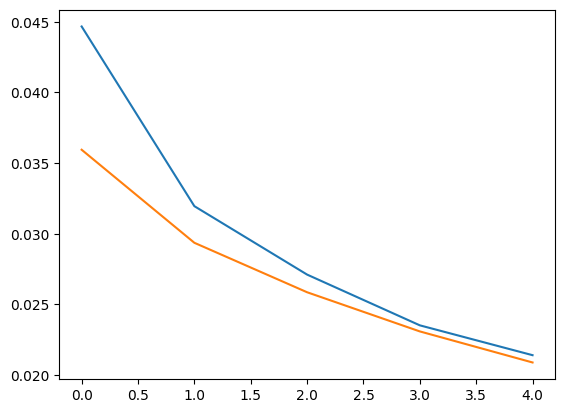

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


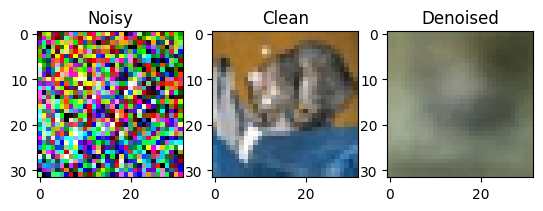

In [ ]:
import numpy as np, tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Add noise
def add_noise(x): return np.clip(x + 0.5*np.random.randn(*x.shape), 0., 1.)

# Load CIFAR-10
(x_train,_),(x_test,_) = datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train_n, x_test_n = add_noise(x_train), add_noise(x_test)

# Flatten
x_train, x_test = x_train.reshape(len(x_train), -1), x_test.reshape(len(x_test), -1)
x_train_n, x_test_n = x_train_n.reshape(len(x_train_n), -1), x_test_n.reshape(len(x_test_n), -1)

# MLP Model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(32*32*3,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(32*32*3, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train_n, x_train, epochs=5, batch_size=256, validation_split=0.2)

# Plot loss
plt.plot(history.history['loss']); plt.plot(history.history['val_loss']); plt.show()

# Denoise example
pred = model.predict(x_test_n[:1])
plt.subplot(1,3,1); plt.imshow(x_test_n[0].reshape(32,32,3)); plt.title("Noisy")
plt.subplot(1,3,2); plt.imshow(x_test[0].reshape(32,32,3)); plt.title("Clean")
plt.subplot(1,3,3); plt.imshow(pred[0].reshape(32,32,3)); plt.title("Denoised")
plt.show()
